In [503]:
reset -f

In [1]:
import json
import pandas as pd
import numpy as np
import re
from collections import Counter
import string
import matplotlib.pyplot as plt
from pylab import rcParams
plt.style.use('ggplot')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#load tweets json into dataframe
with open('trump_tweets_oct11.json') as data_file:    
    data = json.load(data_file)
    
tweets = pd.read_json(json.dumps(data))
tweets.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,retweet_count,retweeted,retweeted_status,source,text,truncated,user,withheld_copyright,withheld_in_countries,withheld_scope
0,NaN,None,2015-12-16 13:29:47,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,8875,False,None,677118427048218624,677118427048218624,...,2603,False,NaN,"<a href=""http://twitter.com/download/android"" ...","Thank you, so many people have given me credit...",False,"{u'follow_request_sent': None, u'has_extended_...",NaN,NaN,NaN
1,NaN,None,2015-12-16 13:40:25,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,3012,False,None,677121102405984256,677121102405984256,...,884,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Thank you @davidaxelrod for your nice words th...,False,"{u'follow_request_sent': None, u'has_extended_...",NaN,NaN,NaN
2,NaN,None,2015-12-16 13:46:22,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,2358,False,None,677122599076302848,677122599076302848,...,808,False,NaN,"<a href=""http://twitter.com/download/android"" ...",.@MarkHalperin works so hard but just doesn't ...,False,"{u'follow_request_sent': None, u'has_extended_...",NaN,NaN,NaN
3,NaN,None,2015-12-16 13:49:35,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,5840,False,None,677123407142510592,677123407142510592,...,2053,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Bill O'Reilly calls Trump and campaign brilli...,False,"{u'follow_request_sent': None, u'has_extended_...",NaN,NaN,NaN
4,NaN,None,2015-12-16 14:53:20,"{u'symbols': [], u'user_mentions': [{u'indices...",NaN,3489,False,None,677139452033032193,677139452033032192,...,1129,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Will be interviewed on the @oreillyfactor toni...,False,"{u'follow_request_sent': None, u'has_extended_...",NaN,NaN,NaN


In [90]:
#create new column device which tells if a tweet is from iphone or android or other

tweets.loc[:, 'device'] = tweets['source'] \
.apply(lambda x : 'android' if 'android' in x.lower() else ('iphone' if 'iphone' in x.lower() else 'other'))

#extract the hour from the tweet time. 
tweets.loc[:,'hour'] = pd.to_datetime(tweets['created_at']).dt.tz_localize('UTC').dt.tz_convert('US/Eastern').dt.hour.astype(int)

In [91]:
#filter the tweets to those that happened on android and iphone and group by device and hour of day

andIph = tweets[tweets['device'] != 'other']
grouped = andIph.groupby(['device', 'hour'])

#get the number of tweets per device per , then get the percentages
numtweets = grouped.size()
print numtweets.head()
percentTimes = numtweets.groupby(level=[0]).apply(lambda x : 100* x / x.sum()).reset_index()


device   hour
android  0       49
         1       32
         2        6
         3        9
         4        8
dtype: int64


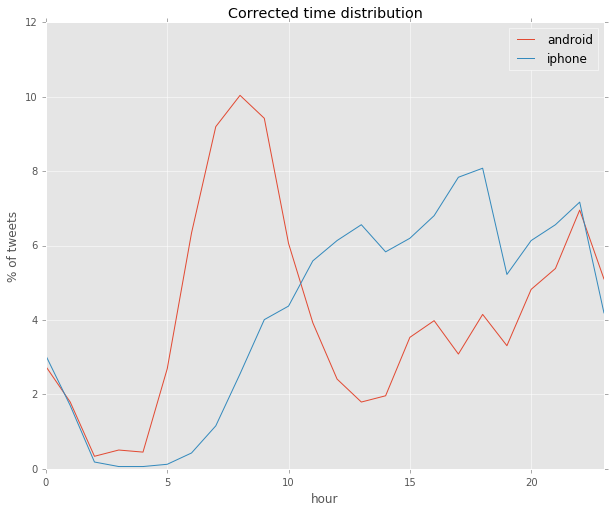

In [92]:
# plot percent tweets for each device

fig, ax = plt.subplots(figsize=(10,8))

for device, frame in percentTimes.groupby('device'):
    frame.plot.line(x = 'hour', y = 0, ax = ax,label=device,title = 'Corrected time distribution')


ax.set_ylabel('% of tweets')
plt.savefig("percenttweettimes.png")

In [509]:
#from nltk.corpus import stopwords
#stop = stopwords.words('english') 
    
    
#with open('stopwords') as data_file:    
#    stp = data_file.read()

#uniqSt =list(set(stp.split() + stop))
#extrawords = 'rt'
#uniqSt.append(extrawords)



In [84]:
stop = "secondly all consider pointing whoever four edu go oldest causes seemed whose certainly \
when's vs young presents to asking indicate those th under sorry a's sent insofar outside far every yourselves little \
we'll inward presented did turns they've large p small thereupon it'll i'll parted smaller says you'd yourself second \
further even what appear exactly brief anywhere above sup new mustn rd ever hasn full c'mon respectively men here youngest\
shouldn let groups others alone along aren't great didnt allows i'd howbeit he'd usually whereupon i'm \
changes thats hither via followed besides merely put viz everybody use from working contains two next \
almost therefore taken themselves thru until today more knows clearly becomes hereby it downing everywhere \
particular known cases must me states none ma room thanks this work itself nine can mr following making my \
example numbers indicated give didn't near high indicates something want comes needs end turn rather meanwhile \
how instead needn okay havent may after containing hereupon such man a third whenever maybe appreciate q ones so \
specifying allow keeps order nearly six help don't furthering indeed over mainly soon years ended through looks\
still its before beside group thank he's somewhere interesting ll actually better willing differently thanx ours\
might haven't then non good somebody greater thereby downs you've they not now nor gets hereafter always reasonably \
qv whither  each went side isn't mean everyone doing eg weren ex ourselves year our beyond out try opened \
furthermore since looking re seriously shouldn't they'll got cause shows regards turning you're differ quite \
que we're members ask anyhow wanted couldnt  could needing tries keep thing place isn w ltd hence onto think \
first already seeming thereafter number welcome one done another wasn open awfully doesn't given there's \
needed ordering inasmuch least name anyone their too gives interests mostly behind nobody took immediate \
part somewhat kept believe herself than here's kind b unfortunately showed gotten older likely nevertheless \
r were toward anyways and sees turned few say unlikely have need seen seem obviously saw orders relatively \
zero thoroughly latter that able aside thorough also take which wanting wonder sure unless shall knew wells \
where's most eight amongst nothing why parting sub don especially won noone later m mrs you'll points weren't \
that's normally fact saying particularly show anyway ending mightn find fifth trying hadn state won't should \
only going specify herein pointed do his goes get hopefully overall selves truly self they'd cannot longest\
despite during him areas regarding course h twice she contain where greetings ignored theirs we hasn't\
see are best definitely said ways away currently please wasn't enough smallest various between probably\
neither across tried available ends never useful opening however come both last many wouldn't thence\
according against etc  became faces whole asked can't otherwise among liked co afterwards point seems\
whatever furthered hadn't couldn't associated throughout considering furthers described puts it's three\
been whom much wherein interest hardly it'd wants corresponding beforehand concerning else worked an hers\
former present case myself novel look these nd value n will while ain theres seven would ve wouldn backing\
wherever is thus them cant someone in ie if different perhaps things make same any member parts appropriate\
several shan higher used upon uses he'll thoughts off whereby largely i com well anybody finds thought without\
greatest very the yours latest lest she'll newest just less being when presumably rooms facts regardless yes ye\
unto we've had except sometimes lets interested she'd has ought gave t's around big showing who's possible early\
five know using apart like necessary d follows she's t fully become works grouping therein why's because old\
often namely downwards some back oh towards moreover thinks shan't happens for though per everything does \
provides tends either be who sensible seconds nowhere although by on about goods ok asks anything getting of \
o mustn't whence plus whereafter consequently or seeing own formerly into within down beings right c's your \
forth how's her area aren downed there long accordingly inner way was opens himself elsewhere i've becoming\
but somehow hi newer highest with he they're made places whether wish j up us tell placed below un problem z \
clear we'd gone  ordered certain specified am doesn general as sometime at et face inc again uucp entirely\
no whereas generally backs lately grouped other latterly you really what's felt problems let's important \
serious sides began younger e longer came backed together hello u presenting ain't evenly having once rt"

stopwords = sorted(stop.split())
extrawords = ["dont", "no", "but", "hillary", "trump", "america","president","media","donald",
              "clinton", "people"]

for i in extrawords:
    stopwords.append(i)

# collect all the tweet text, remove punctuation except the hashtags or '@', remove stopwords, remove single letters

In [85]:
text = ' '.join(tweets['text']).split()

def cleanWords(x):
    removePunct = [re.sub(r"[\$\?\!,\-:\"\'\.\\(\\)]","", word.lower()) for word in x]
    removeascii = [re.sub(r"[^\x00-\x7F]+","", word.lower()) for word in removePunct]
    filtered = [word for word in removeascii if word not in stopwords and len(word) > 1]
    return filtered

cleaned = cleanWords(text)    

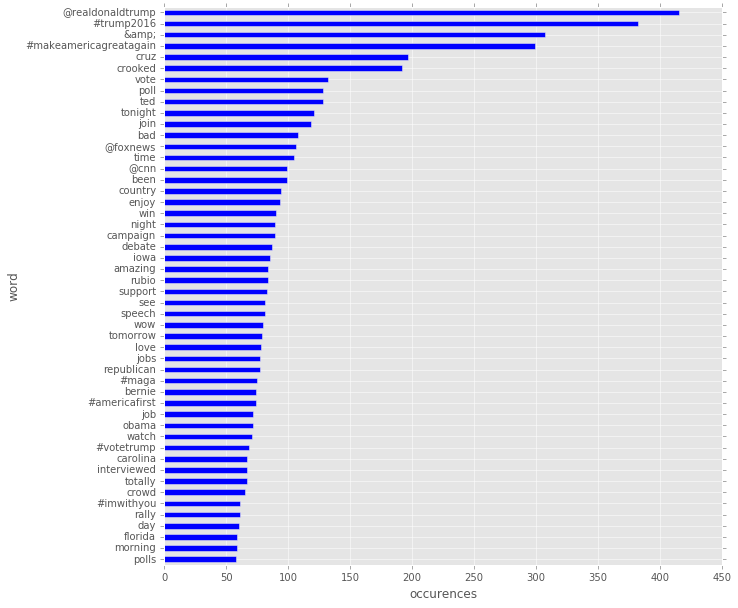

In [86]:
# make a dataframe of 30 most frequent words

dfWords = pd.DataFrame(Counter(cleaned).most_common(50))
dfWords.sort_values(1,inplace = True)
dfWords.set_index(0, inplace=True)

#make plot
rcParams['figure.figsize'] = 10, 10
plt.figure()
ax  = dfWords.plot.barh(legend=False)
ax.set_ylabel('word')
ax.set_xlabel('occurences')

#plt.savefig("word_occurence.png")

# Use the original tweets dataframe to produce a word dataframe where each word occupies a row

In [13]:
# make a new series where each column is a word from the tweets
# add device label for each tweet. and use the device label as the index
# rotate the resulting dataframe, so that each row presents a word and device label

seriesText = tweets['text'].str.split().apply(lambda x: pd.Series(x))
tab1 = pd.concat([seriesText,tweets['device']],axis=1).set_index('device')
wordsRows = tab1.unstack(level=1).reset_index()
wordsRows.dropna(inplace=True)
wordsRows.rename(columns= {0: 'word'},inplace=True)

In [14]:
# remove punctuation, stopwords, single letters

hack = wordsRows['word'].apply(lambda x : re.sub(r"[\$\?\!,\-:\"\'\.\\(\\)]","", x.lower()))
wordsRows['word'] = hack.apply(lambda x :re.sub(r"[^\x00-\x7F]+","", x ))
pred = wordsRows['word'].map(lambda x : len(x) > 1)
filteredTab = wordsRows[(~wordsRows['word'].isin(stopwords)) & pred]

In [15]:
# for each word, get the device counts

wordstab = pd.pivot_table(filteredTab, index = 'word' , columns = 'device', aggfunc='count').reset_index()
wordstab.fillna(0,inplace = True)

In [16]:
#total number of android and iphone for each word
numAndroid = wordstab['level_0']['android'].sum()
numIphone = wordstab['level_0']['iphone'].sum()

# add the logratio column
wordstab['logratio'] =  np.log2((wordstab['level_0']['android'] + 1) * (numIphone + 1) / ((numAndroid+1.0) * (wordstab['level_0']['iphone'] +1)))


# Make a new dataframe to plot

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

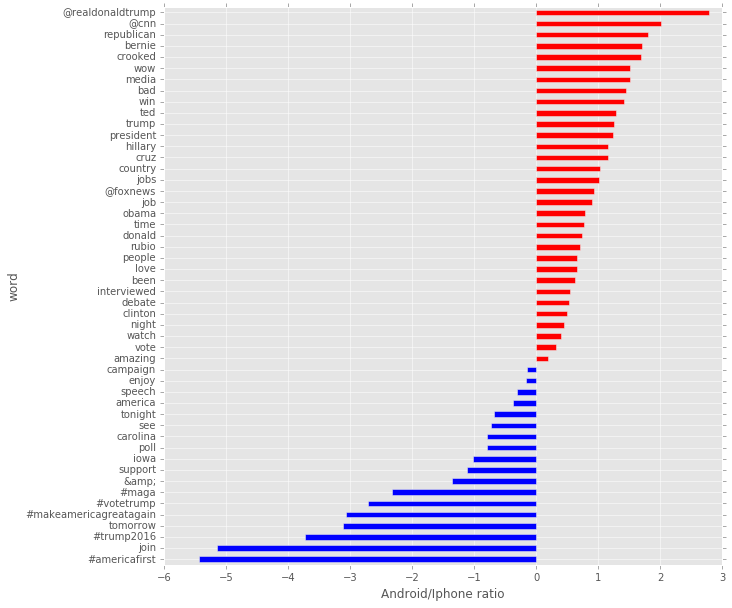

In [17]:
#get the 50 most frequent words
#filter the logratio table by the most frequent words
#add another column to indicate sign of the logratio
#sort the table by logratio

topnwords = filteredTab.groupby('word').size().nlargest(50)

toplogratio = wordstab[wordstab['word'].isin(topnwords.index)]
toplogratio.loc[:,'sign'] =toplogratio['logratio'].map(lambda x : 'r' if  x >= 0 else 'b')
toplogratio.set_index('word', inplace=True)
toplogratio.sort_values('logratio',inplace=True)

#plot figure
rcParams['figure.figsize'] = 10, 10
plt.figure()
ax = toplogratio['logratio'].plot.barh(color = toplogratio['sign'],legend = False)
ax.set_xlabel('Android/Iphone ratio')
plt.savefig("logratio.png")